### Python packages relevant for this course

In [1]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

### First Regression in Python

#### Simple Linear regression

In [2]:
# Load the data
data = pd.read_csv("C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.01.+Simple+linear+regression.csv")


In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


We will create a linear regression which predicts GPA based on the SAT score obtained.

E.g. Sit for SAT => Get a score => Apply to college => Attend college => Graduate with some GPA

### Create your first regression

#### Define the dependent and the independent variables

In [5]:
y = data['GPA'] # dependent variable
x1 = data['SAT'] # independent variable

### Explore the data

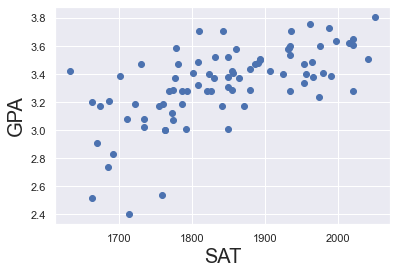

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Each point on the graph represents a different student. The graph also shows that there is a strong relationship between SAT and GPA i.e. the higher the SAT of a student, the higher the GPA.

### Regression itself

In [7]:
x = sm.add_constant(x1) # to add the constant to the equation
results = sm.OLS(y, x).fit() # this will contain the output of the OLS (ordinary least square regression)
results.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.20e-11
Time:                        22:51:40   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

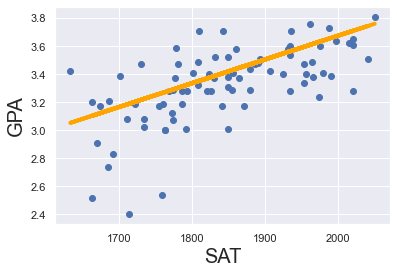

In [8]:
# plotting the regression line on the same scatter plot
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

The graph above shows the best fitting line i.e. the line which is closest to all observations simultaneously

### Using Seaborn for graphs

Seaborn is a package built on top of matplotlib

### How to interpret the regression table

When using stats model, we have 3 main tables: a model summary, a coefficients table and some additional tests.

Coefficients table:

Constants, Coefficients (an bias) are used interchangeably. 

Where b0 (const) = 0.275 and b1(SAT) = 0.0017 => GPA = 0.275 + 0.0017 * SAT or yhat = 0.0017*x1 + 0.275 (regression line). 
With a score of 1700 => GPA = 0.275 + 0.0017 * 1700. GPA = 3.165

Standard Error: Shows the accuracy of prediction for each variable. The lower the standard error, the better the estimate.

p-value: A p-value < 0.005 means that the variable is significant. This tells us that the SAT score is a significant variable when predicting college GPA.

### Decomposition of variability

Here, we will explore the determinants of a good regression.

1. The sum of squares total (SST): is the squared differences between the observed dependent variable and its mean i.e. the dispersion of the observed variables around the mean. It measures the total variability of the dataset. Another common notation is TSS (Total Sum of Squares).

2. The sum of squares regression (SSR): it is the sum of the differences between the predicted value and the mean of the dependent variable. It describes how well your line fits the data (measures the explained variability by your line). Another common notation is ESS (Explained Sum of Squares).

3. The sum of squares error (SSE): It is the difference between the observed value and the predicted value. Error is often minimized; the smaller the error, the better the estimation. It measures the unexplained variability by the regression. It is also know as RSS (Residual(remaining/unexplained) Sum of Squares).

CONNECTION AMONG THESE THREE

SST = SSR + SSE => Total variability = Explained variability + Unexplained variability.

Lower error = Better regression

Higher error = Less powerful regression

### What is the OLS?

OLS (Ordinary Least Squares): is the most common method to estimate the linear regression equation. It stands for minimum squares error (SSE). 

Lower error => better explanatory power

Lowest error => best explanatory power

Other methods include:

- Generalized least squares
- Maximum likelihood estimation
- Bayesian regression
- Kernel regression
- Gaussian process regression

The OLS is hovever simple and most powerful.

### R-squared

The r-square measures the goodness of fit of your model. The more factors included in the regression, the higher the R-sqaured. Add, only if it results in a better model.

R-squared = SSR/SST i.e. variability explained by the regression/total variablity of the dataset.

It takes the output of 0 - 1

R-sqaure of 0 = Rgression explains none of the variability of the data.

R-sqaure of 1 = Rgression explains the entire variability of the data. This is rare. What is most obtainable is a value from 0.2 - 0.9.

### Multiple linear regression Theory

Multiple regressions address a higher complexity of problems. The more the variables, the more the factors to be cnsidered in the model.

Mutiple regressions are always better than simple ones, as with each additional variable you add, the explanatory power may only increase or stay the same considering the number of variables.

### Adjusted R-squared Theory

The Adjusted R-squared is always smaller than the R-squared as it penaizes excessive use of variables.

In [9]:
# import the relavant libraries

#### Load the data

In [10]:
data = pd.read_csv('C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.02. Multiple linear regression.csv')

In [11]:
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


We have the same data with one additional variable 'Rand123'. it assigns 1, 2 or 3 randomly to each student. We are 100% sure that this variable cannot predict college GPA.

GPA = b0 + b1SAT + b2Rand1,2,3

In [12]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


### Create your first multiple regression

In [13]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [14]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.58e-10
Time:                        22:51:41   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From the results table:

We were penalized for adding an additional variable with no strong explanatory power. Always cherry-pick your data to exclude useless information.

From the co-efficients table:

P-value of the Rand1,2,3 variable is 0.762

Where Null Hyp.: B2 = 0. Therefore, we cannot reject the null hypothesis at 76% significance level(high p-value).
For coefficient to be statistically significant, p-value < 0.005

The variable 'Rand1,2,3', not only worsens the explanatory power but is also insignificant. Therefore, it should be dropped. Dropping useless variables is important.

The adjusted R-squared is the basis for comparing regression models.

It makes sense to compare 2 models using

1. Same dependent variable (y)
2. Same dataset

### F-test/F-Statistic

The F-Statistic is used for testing the overall significance of the model.

The F-test is important for regressions as it gives us some important insights.

The lower the F-Statistic, the closer to a non-significant model.

### OLS assumptions

#### Assumptions

1. Linearity: It is called a linear regression.
2. No endogeneity: It is the co-variance of the error
3. Normality and homoscedasticity of the error term:

Normality means the error term is normally distributed. Expected value of the error = 0 (we expect to have no errors on average).

Homoscedasticity means constant variance.

4. No autocorrelation: The co-variance of any 2 error term is zero
5. No multicollinearity: This is observed when 2 or more variables have a high correlation between each other.

The biggest mistake you can make is to perform a regression that violates one of these assumption!

### A1 Linearity

A linear regression is the simplest non-trivial relationship. Each independent variable is multiplied by a coefficient and summed up to predict the value of the dependent variable.

To verify: choose an independent variable (x1) and plot it against the dependent variable (y) on a scatter plot. If the data point form a pattern that looks like a straight line, then a linear regression model is suitable.

After plotting another variable (x2) against y on a scatter plot and there is no straight line that fits the data, say a curved line. Using a linear regression will not be appropriate.

Fixes:

1. Run a non-linear regression
2. Exponential transformation
3. Log transformation

If the relationship is non-linear, do not use the data before transforming it appropriately.

### A2 No endogeneity

It refers to the prohibition of the length between the independent variables and the errors. The error (difference between the observed value and predicted value) is correlated with the independent variable.

Omitted Variable bias: this is introduced when you forget to include a relevant variable. Everything not explained in the model goes into the error. It is hard to fix. It is always different, sneaky and only experience and advanced knowledge can help. Never hesitate to ask for a hand if you cant figure it out.

The incorrect inclusion of a variable leads to bias and counterintuitive estimates that are toxic to your rergession analysis.

### A3 Normality and homoscedasticity

It comprises 3 parts:

Normality: Assumes the error term is normally distributed. When error term is not normally distributed, the Central Limit Theorem applies.

Zero mean: If mean is not expected to be zero, then the line is not a best fitting one. However, having an intercept solves the problem.   

Homoscedasticity: It means having equal variance.

Prevention:
- Look for omitted variable bias(OVB)
- Look for outliers and try to remove them
- Log transformation
    . Take the log of the variable
    . Perform the regression

### A4 No autocorrelation

It is also known as no serial correlation. Errors are assumed to be uncorrelated.It assumes errors should be spread around the regression line.

Detection:
- Plot all the residuals on a graph and look for patterns
- Durbin-Watson test: This falls between 0 and 4. 2 => no autocorrelation. <1 and >3 is a cause for alarm.

There is no remedy for this. Avoid using a linear regression model when error term is auto correlated.

Alternatives:
- Auto regressive model
- Moving average model
- Autoregressive moving average model 
- Auto regressive integrated moving average model

### A5 No multicollinearity

This is observed when 2 or more variales have a high correlation. It is a big problem but the easiest to notice.

Fixes:
- Drop one of the two variables
- Transform them into one (e.g. average price)
- Keep them both.

The correct approach depends on the research at hand. 

Prevention:
- Find the correlation between each two pairs of independent variables.

### Dealing with categorical data – Dummy variables

Dummy variables: An imitation or a copy that stands as a substitute. 

In regression analysis, a dummy is a variable used to include categorical data into a regression model.

In [16]:
raw_data = pd.read_csv('C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.03.+Dummies.csv')

In [17]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


What we will do is to map the 'yes' and 'no' values with 1s and 0s. Yes = 1, No = 0. 

In [18]:
data = raw_data.copy()

In [19]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [20]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [21]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


Given a mean of 0.45, this implies that 46% of the students have attended more than 75% of the lessons 

### Regression

In [22]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.19e-15
Time:                        22:51:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

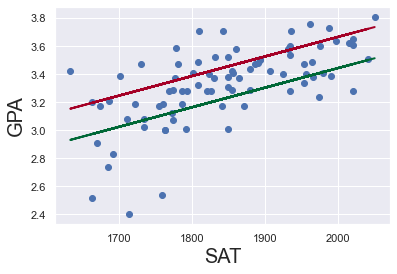

In [24]:
plt.scatter(data['SAT'], y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

- What we observe are 2 equations with same slope but have a different intercept.
- On average, the GPA of those who attended is 0.2226(dummy coef) higher than those who didnt attend.

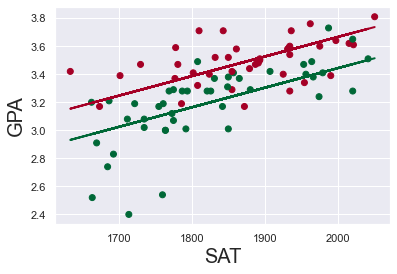

In [25]:
# let's color the points 
# Those that attended classes as the red line and those that didnt attend as green

plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

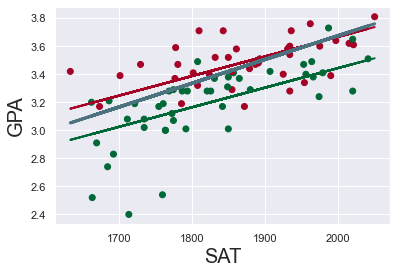

In [26]:
# include the original regression on the graph

plt.scatter(data['SAT'], data['GPA'], c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837', label = 'regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026', label = 'regression line2')
fig = plt.plot(data['SAT'], yhat, lw = 3, c = '#4c7280', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

To use this model for prediction purposes, we need 2 pieces of information; the SAT score and attendance of more than 75% of their lectures.

### Making predictions with the linear regression

Here, we will predict values using the standardized coefficients (weights)

In [27]:
new_data = pd.DataFrame(data = [[1700, 2], [1800, 1]], columns = ['SAT', 'Rand 1, 2, 3'])
new_data                                                                 

,SAT,"Rand 1, 2, 3"
0,1700,2
1,1800,1


In [31]:
#reg.predict(new_data)

In [32]:
#new_data_scaled = scaler.transform(new_data)
#new_data_scaled

In [33]:
#reg.predict(new_data_scaled)

### What happens when 'Rand 1, 2, 3' variable is removed?

In [34]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:, 0].reshape(-1, 1)
reg_simple.fit(x_simple_matrix, y)

NameError: name 'LinearRegression' is not defined

In [36]:
reg_simple.predict(new_data_scaled[:, 0].reshape(-1, 1))

NameError: name 'reg_simple' is not defined